# Introduction
The MNIST dataset is a well-known publicly available dataset in the field of machine learning and computer vision. It can be found in various sources but for this project, we shall use the one in the Tensorflow module. It consists of 70,000 images of handwritten digits (0-9), each image being 28x28 pixels in grayscale.

# Objective
The objective of this project is to:
- Prepare a complete data analysis report on the given data.
- Classify a given image of a handwritten digit into one of the 10 classes representing integer values from 0 to 9.
- Compare between various models and find the classifier that works better.


#  Data Analysis

Load the Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [ ]:
# load the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Data Exploration

In [ ]:
print(f"Training data shape: {x_train.shape}, Labels: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Labels: {y_test.shape}")

Training data shape: (60000, 28, 28), Labels: (60000,)
Test data shape: (10000, 28, 28), Labels: (10000,)


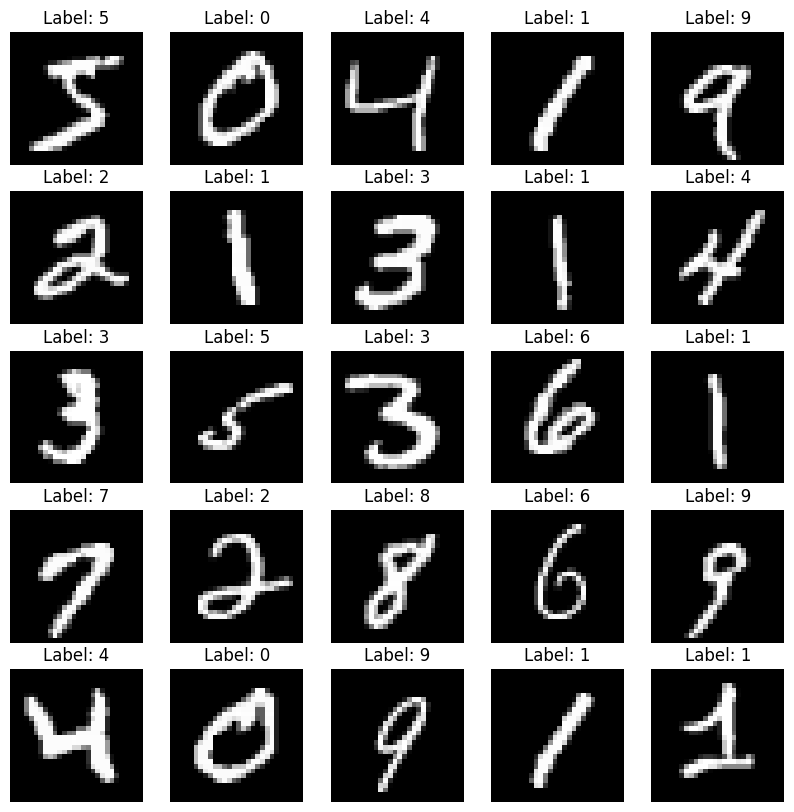

In [ ]:
#Visualize Sample Images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

Data Distribution

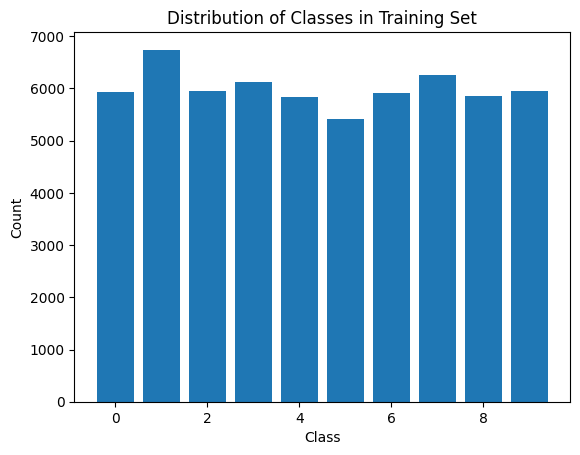

In [ ]:
# Plot distribution of classes in the training set
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Set')
plt.show()

In [ ]:
# Calculate and print basic statistics
print(f"Mean pixel value (train): {np.mean(x_train)}")
print(f"Mean pixel value (test): {np.mean(x_test)}")
print(f"Standard deviation of pixel values (train): {np.std(x_train)}")
print(f"Standard deviation of pixel values (test): {np.std(x_test)}")

Mean pixel value (train): 33.318421449829934
Mean pixel value (test): 33.791224489795916
Standard deviation of pixel values (train): 78.56748998339798
Standard deviation of pixel values (test): 79.17246322228644


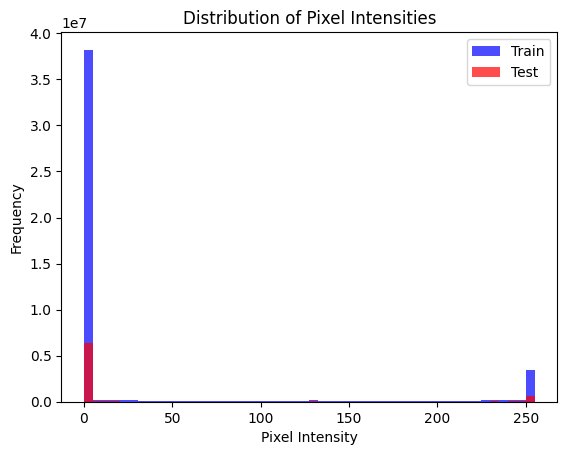

In [ ]:
# Plot the distribution of pixel intensities
plt.hist(x_train.flatten(), bins=50, color='blue', alpha=0.7, label='Train')
plt.hist(x_test.flatten(), bins=50, color='red', alpha=0.7, label='Test')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Distribution of Pixel Intensities')
plt.legend(loc='upper right');

We can see that because the datset contains black and white images, there are more pixel values around 0(black) and 255(white). In between, you can see just little vaiations of gray.

# Classify Handwritten Digits

Preprocessing

In [ ]:
# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
#Reshape Data for CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_cnn.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))





Epoch 1/10


1875/1875 [==============================] - 26s 13ms/step - loss: 0.1284 - accuracy: 0.9611 - val_loss: 0.0441 - val_accuracy: 0.9859
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0407 - accuracy: 0.9870 - val_loss: 0.0353 - val_accuracy: 0.9889
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0280 - accuracy: 0.9911 - val_loss: 0.0321 - val_accuracy: 0.9897
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0208 - accuracy: 0.9932 - val_loss: 0.0368 - val_accuracy: 0.9882
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0155 - accuracy: 0.9951 - val_loss: 0.0327 - val_accuracy: 0.9913
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0119 - accuracy: 0.9959 - val_loss: 0.0352 - val_accuracy: 0.9904
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0098 - accuracy: 0.9969 - val_loss: 0.0

KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)
knn.fit(x_train_flat, y_train)
y_pred_knn = knn.predict(x_test_flat)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")

KNN Accuracy: 0.9705


SVM Model

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(x_train_flat, y_train)
y_pred_svm = svm.predict(x_test_flat)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")

SVM Accuracy: 0.9404


Dense Neural Network (DNN)

In [ ]:
model_dnn = Sequential([
    Dense(512, activation='relu', input_shape=(28*28,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_dnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_dnn.fit(x_train_flat, y_train, epochs=10, validation_data=(x_test_flat, y_test))



Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 0.1912 - accuracy: 0.9418 - val_loss: 0.0988 - val_accuracy: 0.9681
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0841 - accuracy: 0.9743 - val_loss: 0.0807 - val_accuracy: 0.9749
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0599 - accuracy: 0.9817 - val_loss: 0.0974 - val_accuracy: 0.9711
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0485 - accuracy: 0.9845 - val_loss: 0.0809 - val_accuracy: 0.9750
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0385 - accuracy: 0.9882 - val_loss: 0.0749 - val_accuracy: 0.9798
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0313 - accuracy: 0.9903 - val_loss: 0.0895 - val_accuracy: 0.9751
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0281 - accuracy: 0.9916 - val_loss: 0.0900 - val_ac

Recurrent Neural Network (RNN) with LSTM

In [ ]:
from tensorflow.keras.layers import LSTM

# Reshape data for RNN
x_train_rnn = x_train.reshape(-1, 28, 28)
x_test_rnn = x_test.reshape(-1, 28, 28)

model_rnn = Sequential([
    LSTM(128, input_shape=(28, 28)),
    Dense(10, activation='softmax')
])

model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_rnn.fit(x_train_rnn, y_train, epochs=10, validation_data=(x_test_rnn, y_test))

Epoch 1/10
1875/1875 [==============================] - 55s 27ms/step - loss: 0.3377 - accuracy: 0.8905 - val_loss: 0.1399 - val_accuracy: 0.9575
Epoch 2/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1031 - accuracy: 0.9695 - val_loss: 0.0736 - val_accuracy: 0.9782
Epoch 3/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0740 - accuracy: 0.9773 - val_loss: 0.0834 - val_accuracy: 0.9748
Epoch 4/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0602 - accuracy: 0.9816 - val_loss: 0.0700 - val_accuracy: 0.9786
Epoch 5/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0459 - accuracy: 0.9854 - val_loss: 0.0440 - val_accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0388 - accuracy: 0.9882 - val_loss: 0.0526 - val_accuracy: 0.9840
Epoch 7/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0340 - accuracy: 0.9892 - val_loss: 0.0662 -

# Comparing Models

Evaluate Models

In [ ]:
# CNN Model
loss_cnn, accuracy_cnn = model_cnn.evaluate(x_test, y_test)
print(f"CNN Accuracy: {accuracy_cnn}")

313/313 [==============================] - 2s 6ms/step - loss: 0.0307 - accuracy: 0.9923
CNN Accuracy: 0.9922999739646912


In [ ]:
# KNN Model
print(f"KNN Accuracy: {accuracy_knn}")

KNN Accuracy: 0.9705


In [ ]:
# SVM Model
print(f"SVM Accuracy: {accuracy_svm}")

SVM Accuracy: 0.9404


In [ ]:
# DNN Model
loss_dnn, accuracy_dnn = model_dnn.evaluate(x_test_flat, y_test)
print(f"DNN Accuracy: {accuracy_dnn}")

313/313 [==============================] - 1s 4ms/step - loss: 0.0818 - accuracy: 0.9818
DNN Accuracy: 0.9818000197410583


In [ ]:
# RNN Model Evaluation
loss_rnn, accuracy_rnn = model_rnn.evaluate(x_test_rnn, y_test)
print(f"RNN Accuracy: {accuracy_rnn}")

313/313 [==============================] - 4s 13ms/step - loss: 0.0352 - accuracy: 0.9892
RNN Accuracy: 0.9891999959945679


Comparison

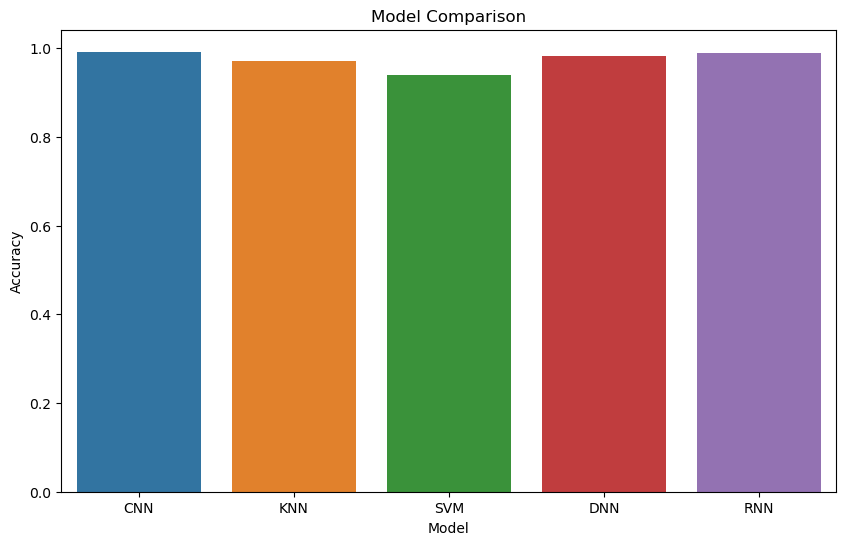

In [ ]:
import numpy as np

accuracies = [accuracy_cnn, accuracy_knn, accuracy_svm, accuracy_dnn, accuracy_rnn]
model_names = ['CNN', 'KNN', 'SVM', 'DNN', 'RNN']

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()


# Model Comparison Report

### Summary of Results

#### Convolutional Neural Network (CNN):
- Test Accuracy: 99.23%
- Loss: 0.0307

#### K-Nearest Neighbors (KNN):
- Test Accuracy: 97.05%

#### Support Vector Machine (SVM):
- Test Accuracy: 94.04%

#### Deep Neural Network (DNN):
- Test Accuracy: 98.18%
- Loss: 0.0818

#### Deep Neural Network (DNN):
- Test Accuracy: 98.18%
- Loss: 0.0352

#### Recurrent Neural Network (RNN):
- Test Accuracy: 98.92%

### Interpretation of results:

In terms of performance,

CNN has the highest accuracy among all models, indicating excellent performance on this task and a very low loss of 0.03, which means it made very few errors in predicting the test set.
RNN is slightly lower than CNN but still very high, meaning it also handles the data well.
DNN performs well also, close to RNN but lower than CNN.
KNN is the lowest among the models, but still has a decent accuracy.

### Recommendations:
Depending on computational resources and specific application needs, DNN or RNN might be more suitable due to their strong performance and flexibility.

However, based on the highest accuracy, lowest loss, and robustness, the CNN is the best-performing model for this task.